<a href="https://colab.research.google.com/github/jeonghyun06/SVM-for-airbnb-price/blob/main/term_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
import matplotlib.pyplot as plt

# Read the CSV file into a Pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/Airbnb_Data.csv')

# Impute missing values
freq = SimpleImputer(strategy='most_frequent')
data = freq.fit_transform(data)

# Convert the NumPy array to a Pandas DataFrame
data = pd.DataFrame(data)

# Apply the LabelEncoder to each column
label = preprocessing.LabelEncoder()
data = data.apply(label.fit_transform)

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Sort the correlation matrix by the 'log_price' column
correlation_with_target = correlation_matrix[1].sort_values(ascending=False)

# Print the sorted correlation matrix
print(correlation_with_target)

1     1.000000
5     0.572785
27    0.530132
28    0.473938
6     0.450782
2     0.111190
8     0.106329
24    0.100183
4     0.095767
7     0.066354
9     0.057318
26    0.044105
22    0.033588
10    0.017217
15   -0.000047
12   -0.000491
14   -0.001982
0    -0.003960
18   -0.010853
13   -0.015135
25   -0.017215
11   -0.022463
21   -0.026536
19   -0.028456
17   -0.031375
16   -0.035384
23   -0.068580
20   -0.158845
3    -0.464611
Name: 1, dtype: float64


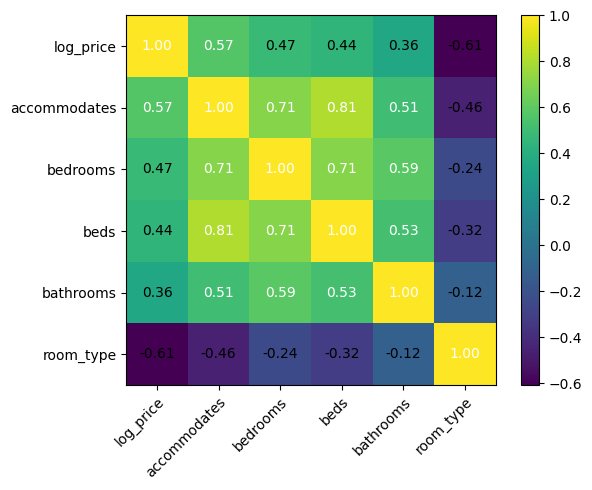

In [ ]:
from mlxtend.plotting import heatmap
cm = np.corrcoef(data.T)
hm = heatmap(cm, row_names=data.columns, column_names=data.columns)
plt.show()

In [ ]:
import multiprocessing
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

data = pd.read_csv('/content/drive/MyDrive/Airbnb_Data.csv')
#
# 불필요한 column 제거
data = data.drop(columns=['id', 'description', 'first_review', 'host_has_profile_pic', 'host_since', 'last_review', 'latitude', 'longitude', 'name', 'neighbourhood', 'thumbnail_url', 'zipcode'])

# 결측치 전처리
# 최빈값으로 처리
freq = SimpleImputer(strategy='most_frequent')
data['bathrooms'] = freq.fit_transform(data[['bathrooms']])
data['bedrooms'] = freq.fit_transform(data[['bedrooms']])
data['beds'] = freq.fit_transform(data[['beds']])

data['host_identity_verified'] = data['host_identity_verified'].fillna('t')  # t로 대체

# ammenities column의 데이터를 개수로 변환
def count_amenities(amenities_str):
    if pd.isna(amenities_str):
        return 0
    return len(amenities_str.split(','))
data['amenities'] = data['amenities'].apply(count_amenities)

# string 값 t,f를 1, 0로 변환
data['instant_bookable'] = data['instant_bookable'].map({'t': 1, 'f': 0})
data['host_identity_verified'] = data['host_identity_verified'].map({'t': 1, 'f': 0})

# 평균으로 처리
mean = SimpleImputer(strategy='mean')
data['review_scores_rating'] = mean.fit_transform(data[['review_scores_rating']])
data['host_response_rate'] = pd.to_numeric(data['host_response_rate'].str.replace('%',''))
data['host_response_rate'] = mean.fit_transform(data[['host_response_rate']])

# string 데이터 전처리 -> labeling
label = preprocessing.LabelEncoder()
data['property_type'] = label.fit_transform(data['property_type'])

# one-hot encoding
if 'city' in data.columns:
    data = pd.get_dummies(data, columns=['city'])
if 'room_type' in data.columns:
    data = pd.get_dummies(data, columns=['room_type'])
if 'bed_type' in data.columns:
    data = pd.get_dummies(data, columns=['bed_type'])
if 'cancellation_policy' in data.columns:
    data = pd.get_dummies(data, columns=['cancellation_policy'])

In [ ]:
# model selection
from sklearn.model_selection import train_test_split
X, y = data.drop(columns=['log_price']), data['log_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Support Vector Regression (SVR)
svr = SVR(kernel='rbf', C=10.0, gamma='auto')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.21464890404930265
R-squared: 0.5874232087086904


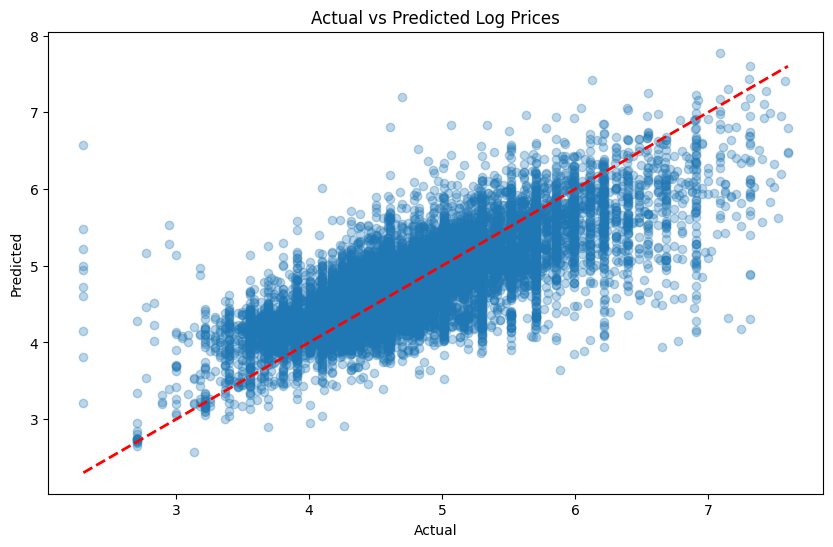

In [ ]:
import matplotlib.pyplot as plt

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Log Prices')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
y_baseline_pred = np.full_like(y_test, y_train.mean())
baseline_mse = mean_squared_error(y_test, y_baseline_pred)
print(f'Baseline Mean Squared Error: {baseline_mse}')
print(f'Baseline RMSE: {np.sqrt(baseline_mse)}')

Baseline Mean Squared Error: 0.5202743689560134
Baseline RMSE: 0.7213004706472979
